In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Fir_Details_final_refined.csv")
df.head()

C:\Users\HP1\AppData\Local\Temp\ipykernel_14432\3227585359.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Fir_Details_final_refined.csv")


,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,Direction,Day_Offence_From,Hour_Offence_From,Minute_Offence_From,Day_Offence_To,Hour_Offence_To,Minute_Offence_To,Day_FIR_Reg,Hour_FIR_Reg,Minute_FIR_Reg
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00,2015-12-27 12:05:00,2016-01-05 11:00:00,05/01/2016,...,WEST,27,12,0,27.0,12.0,5.0,5,11,0
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00,2016-01-12 17:35:00,2016-01-12 19:00:00,12/01/2016,...,WEST,12,17,30,12.0,17.0,35.0,12,19,0
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00,2016-01-12 17:50:00,2016-01-12 19:30:00,12/01/2016,...,EAST,12,17,45,12.0,17.0,50.0,12,19,30
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00,2016-01-14 21:35:00,2016-01-15 14:00:00,15/01/2016,...,WEST,14,21,30,14.0,21.0,35.0,15,14,0
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00,2016-01-18 15:05:00,2016-01-18 19:30:00,18/01/2016,...,NORTH,18,15,0,18.0,15.0,5.0,18,19,30


In [3]:
df.shape

(1694183, 51)

In [4]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg'],
      dtype='object')

In [5]:
df.isnull().sum()

District_Name                  0
UnitName                       0
FIRNo                          0
RI                             0
Year                           0
Month                          0
Offence_From_Date              0
Offence_To_Date                0
FIR_Reg_DateTime               0
FIR_Date                       0
FIR Type                       0
FIR_Stage                      0
Complaint_Mode                 0
CrimeGroup_Name                0
CrimeHead_Name                 0
Latitude                       0
Longitude                      0
ActSection                     0
IOName                         0
KGID                           0
Internal_IO                    0
Place of Offence               0
Distance from PS               0
Beat_Name                      0
Village_Area_Name              0
Male                           0
Female                         0
Boy                            0
Girl                           0
Age 0                          0
VICTIM COU

In [6]:
df.dropna()

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,Direction,Day_Offence_From,Hour_Offence_From,Minute_Offence_From,Day_Offence_To,Hour_Offence_To,Minute_Offence_To,Day_FIR_Reg,Hour_FIR_Reg,Minute_FIR_Reg
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00,2015-12-27 12:05:00,2016-01-05 11:00:00,05/01/2016,...,WEST,27,12,0,27.0,12.0,5.0,5,11,0
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00,2016-01-12 17:35:00,2016-01-12 19:00:00,12/01/2016,...,WEST,12,17,30,12.0,17.0,35.0,12,19,0
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00,2016-01-12 17:50:00,2016-01-12 19:30:00,12/01/2016,...,EAST,12,17,45,12.0,17.0,50.0,12,19,30
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00,2016-01-14 21:35:00,2016-01-15 14:00:00,15/01/2016,...,WEST,14,21,30,14.0,21.0,35.0,15,14,0
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00,2016-01-18 15:05:00,2016-01-18 19:30:00,18/01/2016,...,NORTH,18,15,0,18.0,15.0,5.0,18,19,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694178,Yadgir,Yadgiri Women PS,0002/2024,1,2024,1,2024-01-10 05:30:00,2024-01-10 21:30:00,2024-01-11 21:30:00,11/01/2024,...,EAST,10,5,30,10.0,21.0,30.0,11,21,30
1694179,Yadgir,Yadgiri Women PS,0003/2024,1,2024,1,2024-01-19 22:30:00,2024-01-19 22:35:00,2024-01-29 19:30:00,29/01/2024,...,WEST,19,22,30,19.0,22.0,35.0,29,19,30
1694180,Yadgir,Yadgiri Women PS,0004/2024,1,2024,2,2024-02-06 15:42:00,2024-02-06 15:45:00,2024-02-07 17:45:00,07/02/2024,...,EAST,6,15,42,6.0,15.0,45.0,7,17,45
1694181,Yadgir,Yadgiri Women PS,0005/2024,1,2024,2,2024-02-19 12:10:00,2024-02-19 12:15:00,2024-02-24 17:00:00,24/02/2024,...,WEST,19,12,10,19.0,12.0,15.0,24,17,0


In [7]:
df['CrimeGroup_Name'] = df['CrimeGroup_Name'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694183 entries, 0 to 1694182
Data columns (total 51 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   District_Name                object 
 1   UnitName                     object 
 2   FIRNo                        object 
 3   RI                           int64  
 4   Year                         int64  
 5   Month                        int64  
 6   Offence_From_Date            object 
 7   Offence_To_Date              object 
 8   FIR_Reg_DateTime             object 
 9   FIR_Date                     object 
 10  FIR Type                     object 
 11  FIR_Stage                    object 
 12  Complaint_Mode               object 
 13  CrimeGroup_Name              object 
 14  CrimeHead_Name               object 
 15  Latitude                     float64
 16  Longitude                    float64
 17  ActSection                   object 
 18  IOName                       object 
 19  

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Combine 'UnitName' and 'Beat_Name' into a new column
df['Unit_Beat'] = df['UnitName'] + '_' + df['Beat_Name']

# Apply label encoding to the combined column
encoder = LabelEncoder()
df['Unit_Beat_encoded'] = encoder.fit_transform(df['Unit_Beat'])

# Store the mapping in a dictionary
unit_beat_mapping = {index: label for index,
                     label in enumerate(encoder.classes_)}

# Now, 'unit_beat_mapping' contains each unique 'Unit_Beat' combination's encoded value

In [10]:
df['Unit_Beat_encoded']

0            486
1            497
2            497
3            486
4            489
           ...  
1694178    18874
1694179    18875
1694180    18878
1694181    18874
1694182    18875
Name: Unit_Beat_encoded, Length: 1694183, dtype: int32

In [ ]:
enc = LabelEncoder()

for i in string_columns:
    df[i] = df[i].astype(str)
    df[i] = enc.fit_transform(df[i])
df.head()

In [ ]:
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
float_columns

In [ ]:
enc = LabelEncoder()

for i in string_columns:
    df[i] = df[i].astype(float)
    df[i] = enc.fit_transform(df[i])
df.head()

In [13]:
corr_matrix = df.corr()
corr_matrix

C:\Users\HP1\AppData\Local\Temp\ipykernel_20720\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,RI,Year,Month,Latitude,Longitude,Internal_IO,Male,Female,Boy,Girl,...,Day_Offence_From,Hour_Offence_From,Minute_Offence_From,Day_Offence_To,Hour_Offence_To,Minute_Offence_To,Day_FIR_Reg,Hour_FIR_Reg,Minute_FIR_Reg,Unit_Beat_encoded
RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,1.000000,-0.022513,-0.066257,0.033211,-0.000754,0.148594,0.098733,0.011975,0.037101,...,0.008693,0.047093,0.012562,0.002732,0.064893,0.025516,-0.000683,0.055914,-0.005632,0.006399
Month,NaN,-0.022513,1.000000,0.011386,0.000139,0.010367,0.016250,0.013157,0.004385,0.006715,...,0.014097,0.014305,0.006512,0.013202,0.004496,0.003782,0.016890,0.004258,-0.004781,-0.000074
Latitude,NaN,-0.066257,0.011386,1.000000,-0.139512,0.060814,-0.033451,-0.006911,-0.006150,-0.001910,...,-0.000934,-0.017656,-0.013024,0.003782,-0.030636,-0.021921,0.005969,-0.013315,0.025842,0.006582
Longitude,NaN,0.033211,0.000139,-0.139512,1.000000,-0.002533,0.000493,-0.001148,-0.000246,0.000007,...,-0.002387,0.001768,-0.001725,-0.002272,0.008387,0.003074,-0.002205,0.002615,-0.004180,-0.013082
Internal_IO,NaN,-0.000754,0.010367,0.060814,-0.002533,1.000000,-0.017342,-0.010706,-0.005377,-0.006002,...,0.000140,-0.012867,-0.002393,0.000368,-0.006962,0.000200,0.000106,-0.014723,0.007142,0.011599
Male,NaN,0.148594,0.016250,-0.033451,0.000493,-0.017342,1.000000,0.031585,0.039116,-0.037304,...,0.013799,0.099159,0.059214,0.003495,0.072218,0.051633,0.003290,-0.004734,-0.020093,0.007749
Female,NaN,0.098733,0.013157,-0.006911,-0.001148,-0.010706,0.031585,1.000000,0.086250,0.125239,...,0.001231,-0.029374,-0.031329,0.002279,0.007054,-0.026168,0.002102,0.030306,-0.020374,-0.000420
Boy,NaN,0.011975,0.004385,-0.006150,-0.000246,-0.005377,0.039116,0.086250,1.000000,0.135409,...,0.004982,0.010222,0.013751,0.001597,0.013079,0.009176,0.000763,0.007135,-0.006361,0.000309
Girl,NaN,0.037101,0.006715,-0.001910,0.000007,-0.006002,-0.037304,0.125239,0.135409,1.000000,...,-0.002654,-0.021621,-0.019876,0.002499,-0.004793,-0.024957,0.002485,0.019848,-0.007957,-0.000514


<Axes: >

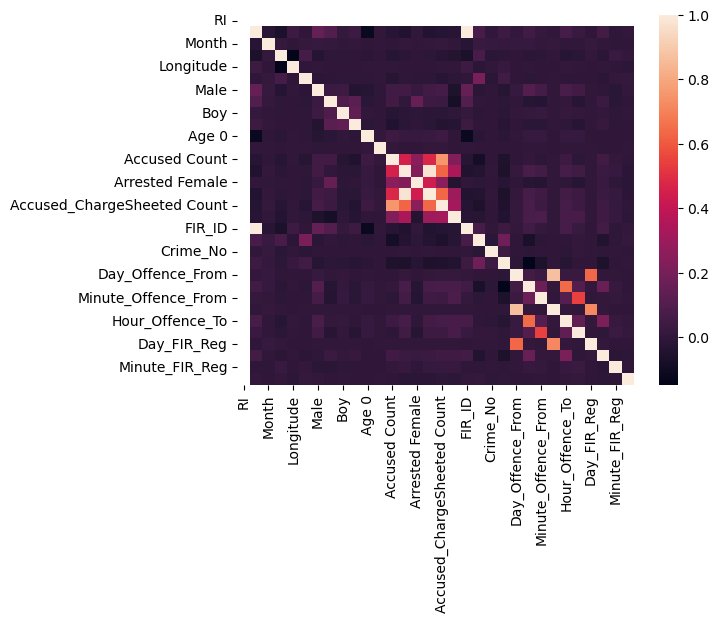

In [14]:
import seaborn as sns
sns.heatmap(corr_matrix)

In [ ]:
df.isnull().sum()

In [ ]:
df_clean_rows = df.dropna()

In [ ]:
df_clean_columns = df.dropna(axis=1)

In [ ]:
df

In [ ]:
print(df['Beat_Name'].unique())

In [ ]:
print(df['VICTIM COUNT'].unique())

In [15]:
print(df['Accused_ChargeSheeted Count'].unique())

[  1   5   2   8  34  13  19  12   7  11  16   0   6   4  10   3   9  20
  15  24  14  21  23  17  25  22  39  26  18  31  28  27  29  49  36  44
  37  45  32  40  42  56  41  43  57  46  48  38  53  68  35  30  52  67
  33  51  79 116  58  74  55  65  50  77  69  64  54  85  59  72 196 293
  75  47 124  71 100 109  61 128  82  73  60  81  66  86 203 143  92  63
 160  70  89  98 105  78 102  87  80 155 107 115 139  84  94  90 154 330
  97  93 111  95 131  62 101 167  76 110 103 108 104  83 117  91 106 130
 133]


In [11]:
df = df.rename(columns={'Conviction Count': 'ConvictionCount'})

In [12]:
df.UnitName

0                Amengad PS
1                Amengad PS
2                Amengad PS
3                Amengad PS
4                Amengad PS
                 ...       
1694178    Yadgiri Women PS
1694179    Yadgiri Women PS
1694180    Yadgiri Women PS
1694181    Yadgiri Women PS
1694182    Yadgiri Women PS
Name: UnitName, Length: 1694183, dtype: object

In [13]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'ConvictionCount', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg',
       'Unit_Beat', 'Unit_Beat_encoded'],
      dtype='object')

In [14]:
df['Crime_No']

0          10470124520160001
1          10470124520160002
2          10470124520160003
3          10470124520160004
4          10470124520160005
                 ...        
1694178    10978218320240002
1694179    10978218320240003
1694180    10978218320240004
1694181    10978218320240005
1694182    10978218320240006
Name: Crime_No, Length: 1694183, dtype: int64

In [15]:
# Apply label encoding to the combined column
encoder = LabelEncoder()
df['CrimeGroup_Name_encoded'] = encoder.fit_transform(df['CrimeGroup_Name'])

# Store the mapping in a dictionary
CrimeGroup_Name_encoded = {index: label for index,
                     label in enumerate(encoder.classes_)}

# Now, 'unit_beat_mapping' contains each unique 'Unit_Beat' combination's encoded value

In [16]:
# Apply label encoding to the combined column
encoder = LabelEncoder()
df['CrimeHead_Name_encoded'] = encoder.fit_transform(df['CrimeHead_Name'])

# Store the mapping in a dictionary
CrimeHead_Name_mapping = {index: label for index,
                     label in enumerate(encoder.classes_)}

# Now, 'unit_beat_mapping' contains each unique 'Unit_Beat' combination's encoded value

In [17]:
# Apply label encoding to the combined column
encoder = LabelEncoder()
df['ActSection_encoded'] = encoder.fit_transform(df['ActSection'])

# Store the mapping in a dictionary
ActSection_Name_mapping = {index: label for index,
                     label in enumerate(encoder.classes_)}

# Now, 'unit_beat_mapping' contains each unique 'Unit_Beat' combination's encoded value

In [25]:
df['CrimeGroup_Name_encoded'].unique()

array([ 86,  66,  73,  72, 102,  38,  35,  13,  20,  68,  47,   3,  71,
        70,  19,  55,  98,  17,  77,  74,  96,  14,  67,  49,  50,   9,
        25,  79,  29,  40,  24,  45,  30,  39,   2,  16,   6,  69,  65,
        34,  32,  31, 101,  75,  92,  21,  97,  94,   7,   0,  37,  54,
         5,  36,  42,  12, 106,  27,  33,  11,  46, 105,  87,  10,   8,
        99,  26,  78,  83,  91,  56,   4,   1,  61,  90,  82,  63,  28,
        41,  88,  60,  52,  15,  48,  85,  58,  81, 100,  57,  53,  95,
        84, 103, 104,  22,  44,  43,  62,  89,  64,  76,  59,  93,  80,
        23,  51,  18])

In [31]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'ConvictionCount', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg',
       'Unit_Beat', 'Unit_Beat_encoded', 'CrimeGroup_Name_encoded',
       'CrimeHead_Name_encoded', 'ActSection_encoded'],
      dtype='object'

In [20]:
df['ConvictionCount']

0          0
1          2
2          0
3          0
4          0
          ..
1694178    0
1694179    0
1694180    0
1694181    0
1694182    0
Name: ConvictionCount, Length: 1694183, dtype: int64

In [61]:
df['CrimeHead_Name'].value_counts().head(60)

Other Roads                                                         135376
Simple Hurt                                                         117284
National Highways                                                   108141
Security For Good Behaviour (Sec 107 )                               85627
State Highways                                                       81112
Women                                                                80360
Information Technology Act 2000, 2009                                79754
Of Automobiles - Of Two Wheelers                                     78658
Karnataka Excise Act 1965                                            61202
Street Gambling (87)                                                 53142
Others                                                               49538
CHEATING                                                             49146
Man                                                                  44942
Gambling - Matka (78 Clas

In [35]:
Y = df['CrimeGroup_Name_encoded']
X = df[['Unit_Beat_encoded', 'Year', 'Month','Hour_Offence_From','Distance']] 


<Axes: >

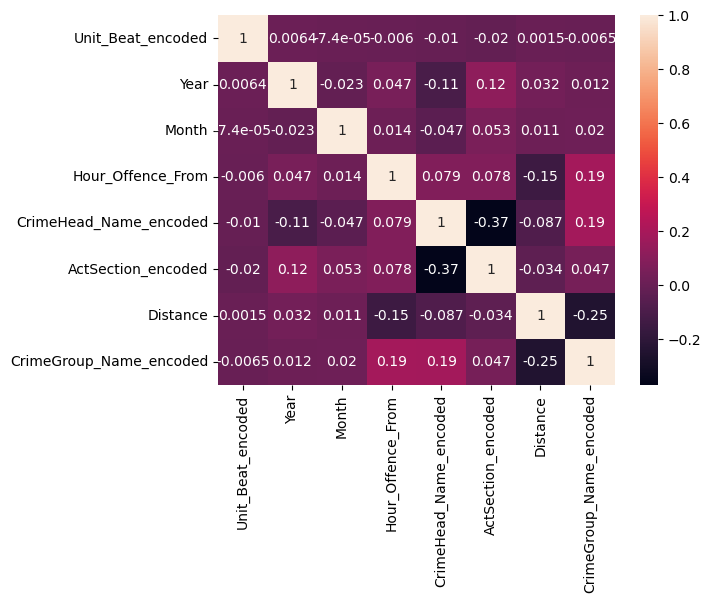

In [34]:
import seaborn as sns
df_S = pd.concat([X, Y], axis=1)
sns.heatmap(df_S.corr(),annot=True)

C:\Users\HP1\AppData\Local\Temp\ipykernel_14432\3936954663.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


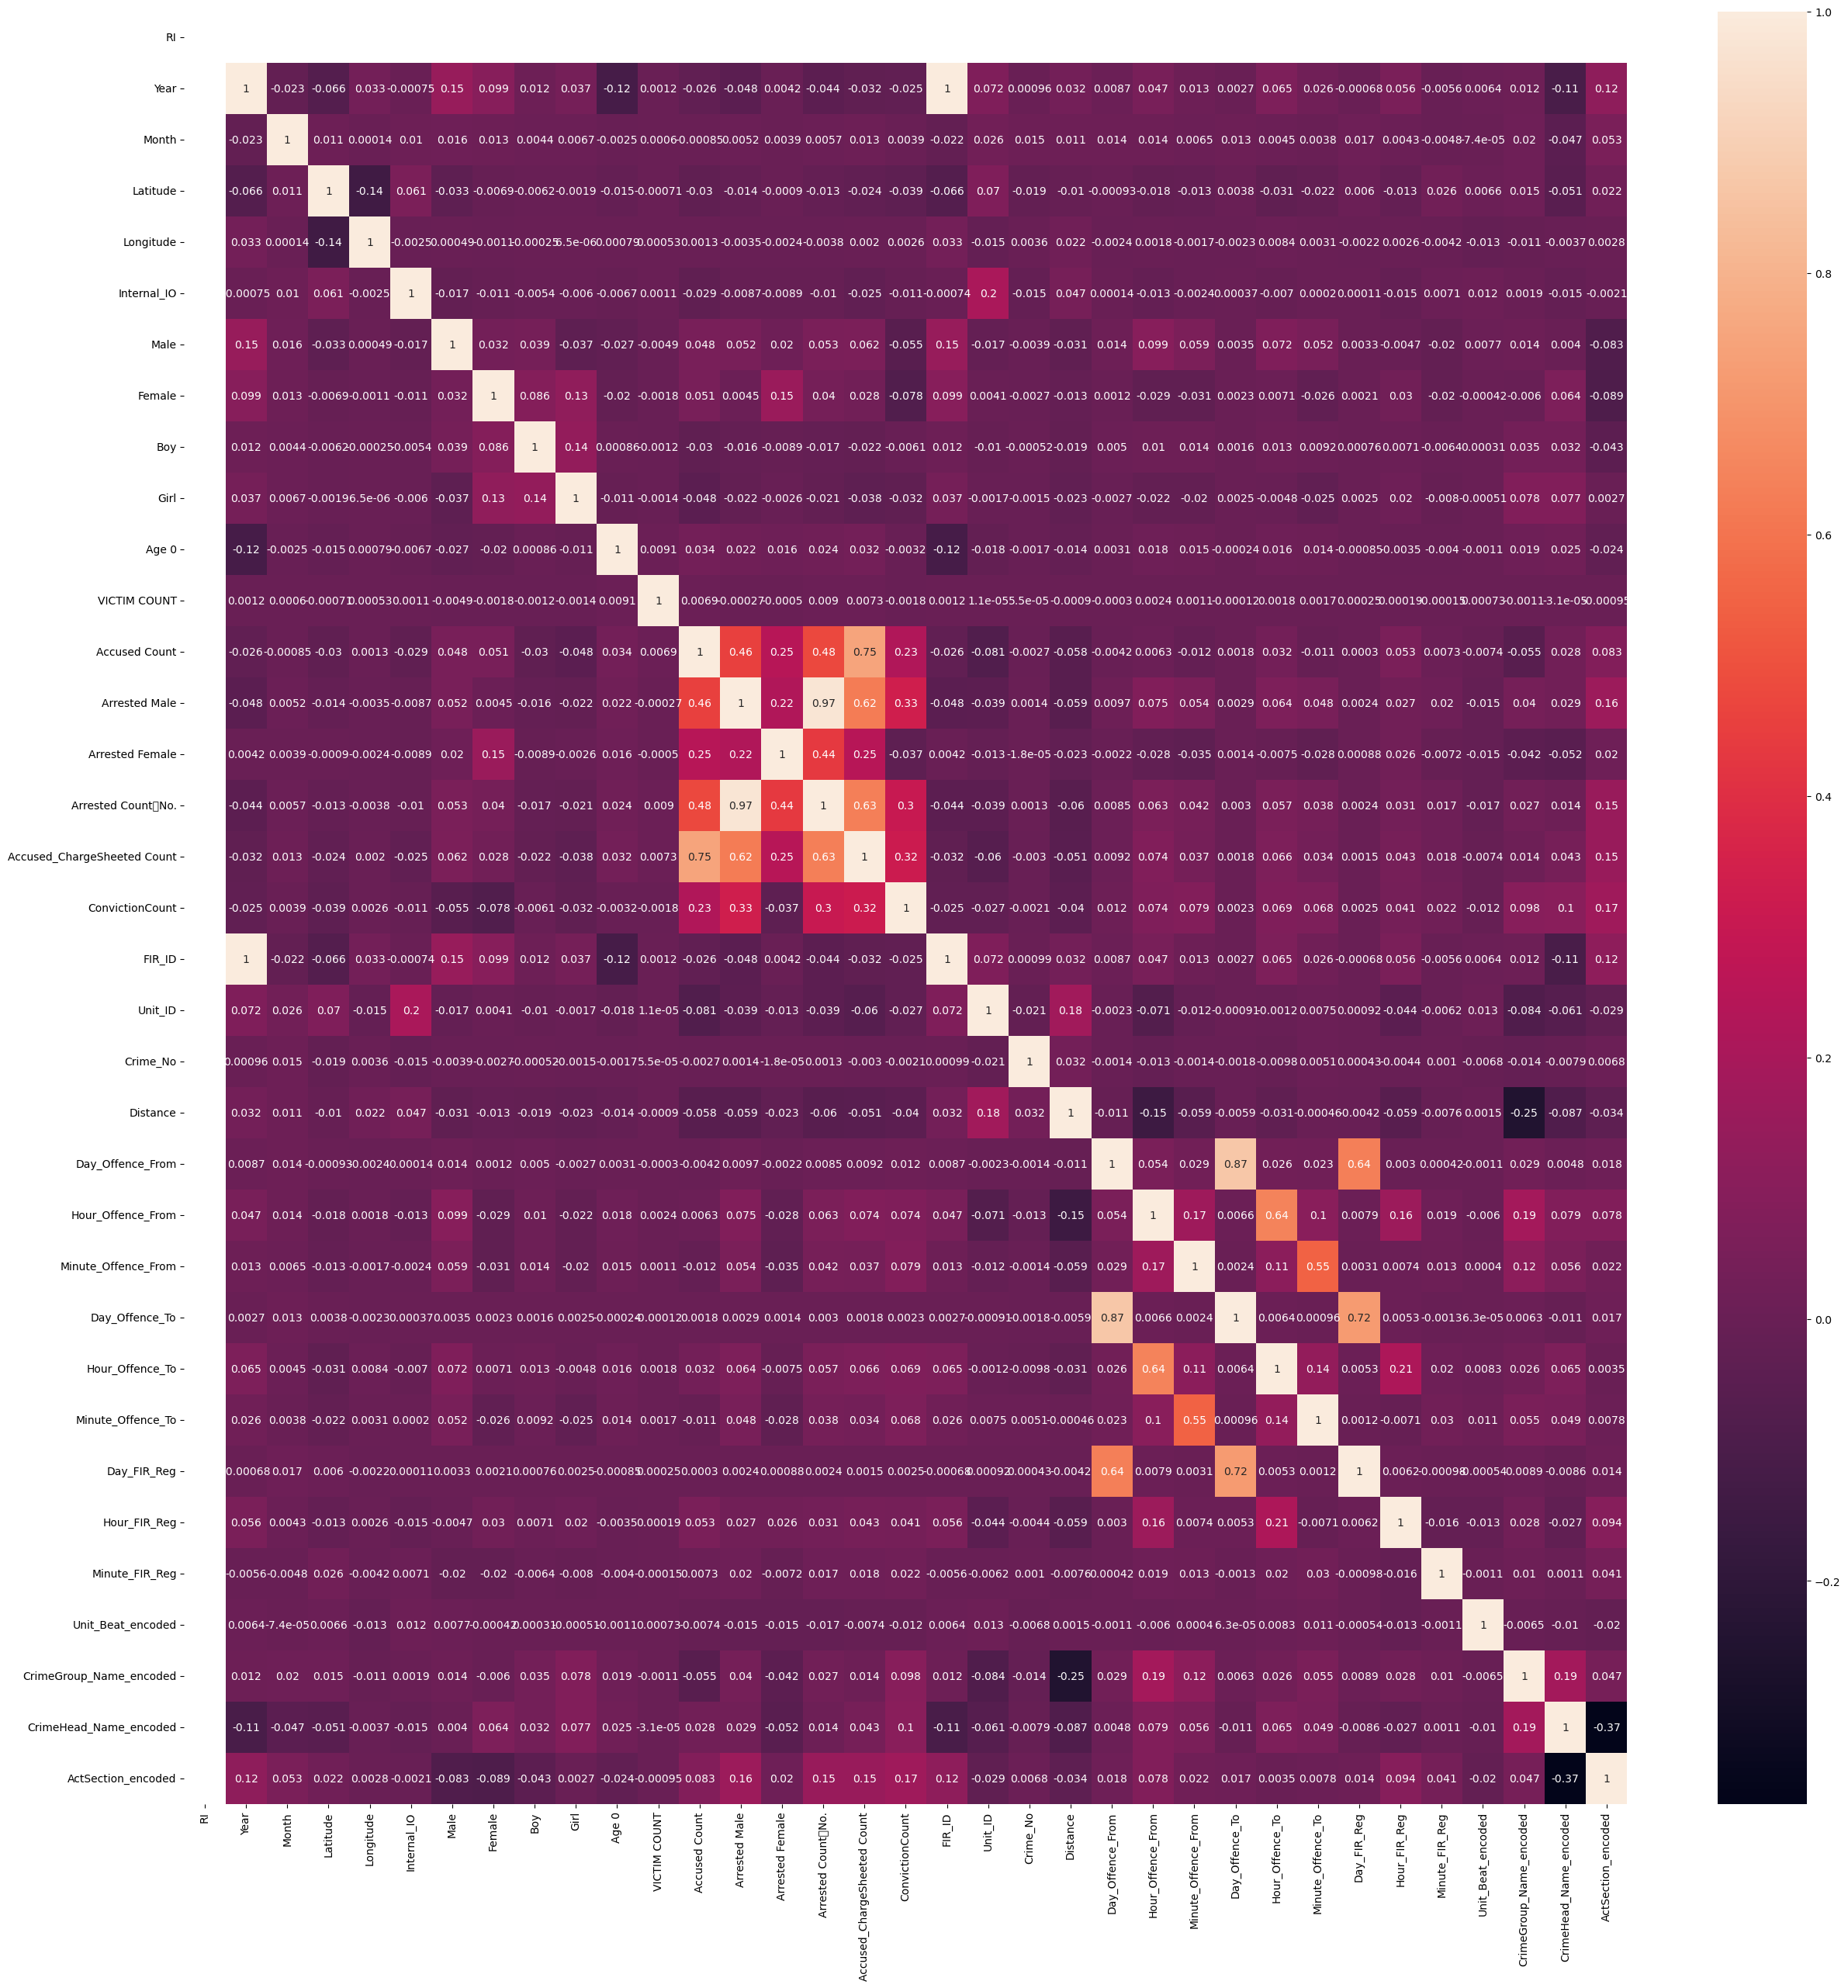

In [47]:
import seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [44]:
df

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,Hour_Offence_To,Minute_Offence_To,Day_FIR_Reg,Hour_FIR_Reg,Minute_FIR_Reg,Unit_Beat,Unit_Beat_encoded,CrimeGroup_Name_encoded,CrimeHead_Name_encoded,ActSection_encoded
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00,2015-12-27 12:05:00,2016-01-05 11:00:00,05/01/2016,...,12.0,5.0,5,11,0,Amengad PS_RURAL BEAT NO 13,486,86,351,212989
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00,2016-01-12 17:35:00,2016-01-12 19:00:00,12/01/2016,...,17.0,35.0,12,19,0,Amengad PS_RURAL BEAT NO 6,497,66,437,206908
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00,2016-01-12 17:50:00,2016-01-12 19:30:00,12/01/2016,...,17.0,50.0,12,19,30,Amengad PS_RURAL BEAT NO 6,497,66,178,206653
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00,2016-01-14 21:35:00,2016-01-15 14:00:00,15/01/2016,...,21.0,35.0,15,14,0,Amengad PS_RURAL BEAT NO 13,486,73,285,105415
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00,2016-01-18 15:05:00,2016-01-18 19:30:00,18/01/2016,...,15.0,5.0,18,19,30,Amengad PS_RURAL BEAT NO 16,489,72,350,69053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694178,Yadgir,Yadgiri Women PS,0002/2024,1,2024,1,2024-01-10 05:30:00,2024-01-10 21:30:00,2024-01-11 21:30:00,11/01/2024,...,21.0,30.0,11,21,30,Yadgiri Women PS_BEAT NO 1,18874,70,471,13168
1694179,Yadgir,Yadgiri Women PS,0003/2024,1,2024,1,2024-01-19 22:30:00,2024-01-19 22:35:00,2024-01-29 19:30:00,29/01/2024,...,22.0,35.0,29,19,30,Yadgiri Women PS_BEAT NO 2,18875,86,407,133256
1694180,Yadgir,Yadgiri Women PS,0004/2024,1,2024,2,2024-02-06 15:42:00,2024-02-06 15:45:00,2024-02-07 17:45:00,07/02/2024,...,15.0,45.0,7,17,45,Yadgiri Women PS_BEAT NO 5,18878,71,348,121856
1694181,Yadgir,Yadgiri Women PS,0005/2024,1,2024,2,2024-02-19 12:10:00,2024-02-19 12:15:00,2024-02-24 17:00:00,24/02/2024,...,12.0,15.0,24,17,0,Yadgiri Women PS_BEAT NO 1,18874,29,106,182535


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1000)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier with, for example, k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on your training data
knn.fit(X_train, Y_train)

# Now you can make predictions, evaluate the model, etc.


KNeighborsClassifier()

In [31]:
X_train

,Unit_Beat_encoded,Year,Month,Hour_Offence_From,CrimeHead_Name_encoded,ActSection_encoded,Distance
881980,5165,2022,1,12,351,168245,12.0
581552,2691,2022,10,0,215,12601,22.0
1027631,1879,2021,2,20,436,54360,1.0
939729,6818,2021,11,18,230,204213,13.0
1017637,9917,2019,8,12,471,13168,1.0
...,...,...,...,...,...,...,...
18782,10096,2017,9,18,125,140506,15.0
376059,11365,2017,2,12,430,1232,2.0
134848,17004,2022,6,16,178,206653,28.0
1120327,10757,2018,3,0,300,140506,13.0


In [37]:
X_train_scaled

array([[-0.86236857,  1.01370439, -1.52604669, ...,  0.3629946 ,
         0.96461971, -0.16586102],
       [-1.30465237,  1.01370439,  1.0823968 , ..., -0.7213928 ,
        -1.27846616, -0.16586101],
       [-1.44981585,  0.60875034, -1.23621964, ...,  1.04073673,
        -0.67665033, -0.16586103],
       ...,
       [ 1.25412211,  1.01370439, -0.07691142, ..., -1.01640996,
         1.51814212, -0.165861  ],
       [ 0.13732869, -0.60611181, -0.94639258, ..., -0.04365067,
         0.56485513, -0.16586102],
       [ 0.1845247 ,  0.20379629, -0.65656553, ..., -1.9572755 ,
        -0.81661621, -0.16586103]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier with, for example, k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on your training data
knn.fit(X_train, y_train)

# Now you can make predictions, evaluate the model, etc.


In [38]:
Y_predict_knn = knn.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict_knn))

0.32313609383632474


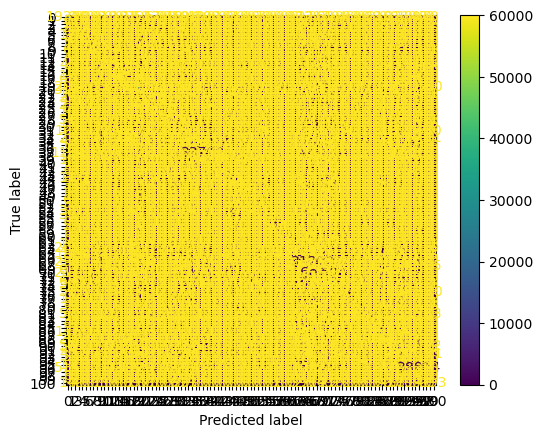

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# First, compute the confusion matrix
cm = confusion_matrix(Y_test, Y_predict_knn)

# Now, use ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()


In [63]:
import joblib

# Assuming your model is named 'knn'
# Specify your desired file path and name for the model
model_filename = 'knn_model.pkl'

# Save the model to disk
joblib.dump(knn, model_filename)

print(f"Model saved to {model_filename}")



Model saved to knn_model.pkl


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,Y_train)

In [ ]:
Y_predict_nb = model_nb.predict(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,Y_train)

In [ ]:
Y_predict_mlp = model_mlp.predict(X_test)